In [25]:
!pip install xgboost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load the dataset
df = pd.read_csv(r'C:\Users\Home\Downloads\sales_data_practice.csv')

In [78]:
df1 = df

In [80]:
df.head(5)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
0,-0.019267,-1.079275,-0.374072,0.063934,-1.046548,-1.612589,-0.350440,-1.626098,0.0,-1.573162,...,0.155423,0.187261,0.496809,0.519510,-0.328982,-1.612589,-0.244192,1.506370,0.366701,-0.272237
1,0.739836,-1.079275,-1.263620,0.063934,0.740020,-1.062969,1.200204,-1.626098,0.0,-1.504078,...,-1.694339,-1.748627,1.111522,0.987722,1.251736,-1.062969,-1.618642,-1.221220,1.127123,0.227317
2,-0.778369,0.926548,0.281385,0.063934,1.454647,1.135508,1.420653,-1.325025,0.0,-1.434993,...,-0.628894,-0.602936,-1.230422,-1.158252,0.066198,1.135508,-0.931417,-0.150900,-1.154143,0.013222
3,0.739836,-1.079275,-1.450894,1.463387,0.382706,-1.062969,-0.183050,-1.325025,0.0,-1.365909,...,0.014859,-0.452473,1.247287,-0.065756,-0.328982,-1.062969,-0.931417,1.644476,0.366701,0.869601
4,1.119388,-1.079275,-0.046343,-1.335518,0.382706,0.585889,0.307505,-1.325025,0.0,-1.296824,...,-1.431903,-0.345697,1.450934,-1.665482,-1.514520,0.585889,1.817484,-0.081847,-1.534355,-0.807473


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      197 non-null    int64 
 1   Date                       197 non-null    object
 2   Holiday_Flag               197 non-null    int64 
 3   Temperature                197 non-null    int64 
 4   Fuel_Price                 197 non-null    int64 
 5   CPI                        197 non-null    int64 
 6   Unemployment               197 non-null    int64 
 7   Sales                      197 non-null    int64 
 8   Month                      197 non-null    int64 
 9   Day_of_Week                197 non-null    int64 
 10  Week_of_Year               197 non-null    int64 
 11  Is_Weekend                 197 non-null    int64 
 12  Prev_Week_Sales            197 non-null    int64 
 13  Avg_Sales_Past_4_Weeks     197 non-null    int64 
 14  Population

In [34]:
df.describe().round(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.0,197.00,...,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,5.05,0.54,63.99,2.95,214.93,6.93,308754.38,6.40,6.0,25.77,...,2810.13,64466.16,545.26,53.69,5.83,6.93,2.36,100.37,5.04,51.63
std,2.64,0.50,21.41,0.72,2.81,1.82,119360.32,3.33,0.0,14.51,...,1340.88,19529.57,265.84,25.69,2.54,1.82,1.46,29.04,2.64,28.10
min,1.00,0.00,31.00,2.00,210.00,4.00,102554.00,1.00,6.0,1.00,...,522.00,30403.00,110.00,10.00,1.00,4.00,0.00,50.00,1.00,1.00
25%,3.00,0.00,42.00,2.00,212.00,5.00,196818.00,4.00,6.0,13.00,...,1562.00,47959.00,294.00,32.00,4.00,5.00,1.00,78.00,3.00,29.00
50%,5.00,1.00,65.00,3.00,215.00,7.00,320343.00,6.00,6.0,26.00,...,2890.00,64787.00,555.00,53.00,6.00,7.00,2.00,100.00,5.00,51.00
75%,7.00,1.00,83.00,3.00,217.00,8.00,411938.00,9.00,6.0,38.00,...,3842.00,80131.00,780.00,76.00,8.00,8.00,3.00,126.00,7.00,75.00
max,9.00,1.00,100.00,4.00,220.00,10.00,498850.00,12.00,6.0,52.00,...,4997.00,99590.00,997.00,100.00,10.00,10.00,5.00,150.00,9.00,99.00


In [39]:
df.drop(columns=['Date'], inplace=True)

In [41]:
df.sample(5)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
158,6,1,36,2,210,7,447449,2,6,5,...,4865,67797,435,87,8,7,3,80,9,69
179,1,0,75,4,215,10,419024,6,6,26,...,3431,66098,691,56,6,10,4,138,4,41
78,3,0,57,3,212,4,430327,7,6,29,...,4606,54739,509,21,7,4,0,129,6,30
190,4,1,33,2,216,4,411940,9,6,37,...,4453,90764,555,28,5,4,5,121,9,66
167,7,1,36,3,216,4,346660,4,6,14,...,3575,79612,681,17,2,4,2,96,1,42


In [43]:
# Fill missing values with median for numerical columns
df.fillna(df.median(), inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [47]:
df.describe().round(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.0,197.00,...,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.0,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.54,-1.08,-1.54,-1.34,-1.76,-1.61,-1.73,-1.63,0.0,-1.71,...,-1.71,-1.75,-1.64,-1.70,-1.91,-1.61,-1.62,-1.74,-1.53,-1.81
25%,-0.78,-1.08,-1.03,-1.34,-1.05,-1.06,-0.94,-0.72,0.0,-0.88,...,-0.93,-0.85,-0.95,-0.85,-0.72,-1.06,-0.93,-0.77,-0.77,-0.81
50%,-0.02,0.93,0.05,0.06,0.03,0.04,0.10,-0.12,0.0,0.02,...,0.06,0.02,0.04,-0.03,0.07,0.04,-0.24,-0.01,-0.01,-0.02
75%,0.74,0.93,0.89,0.06,0.74,0.59,0.87,0.78,0.0,0.84,...,0.77,0.80,0.89,0.87,0.86,0.59,0.44,0.88,0.75,0.83
max,1.50,0.93,1.69,1.46,1.81,1.69,1.60,1.69,0.0,1.81,...,1.64,1.80,1.70,1.81,1.65,1.69,1.82,1.71,1.51,1.69


In [49]:
# Cap values at -3 and 3
df= df.clip(lower=-3, upper=3)

In [54]:
df.describe().round(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.0,197.00,...,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.0,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.54,-1.08,-1.54,-1.34,-1.76,-1.61,-1.73,-1.63,0.0,-1.71,...,-1.71,-1.75,-1.64,-1.70,-1.91,-1.61,-1.62,-1.74,-1.53,-1.81
25%,-0.78,-1.08,-1.03,-1.34,-1.05,-1.06,-0.94,-0.72,0.0,-0.88,...,-0.93,-0.85,-0.95,-0.85,-0.72,-1.06,-0.93,-0.77,-0.77,-0.81
50%,-0.02,0.93,0.05,0.06,0.03,0.04,0.10,-0.12,0.0,0.02,...,0.06,0.02,0.04,-0.03,0.07,0.04,-0.24,-0.01,-0.01,-0.02
75%,0.74,0.93,0.89,0.06,0.74,0.59,0.87,0.78,0.0,0.84,...,0.77,0.80,0.89,0.87,0.86,0.59,0.44,0.88,0.75,0.83
max,1.50,0.93,1.69,1.46,1.81,1.69,1.60,1.69,0.0,1.81,...,1.64,1.80,1.70,1.81,1.65,1.69,1.82,1.71,1.51,1.69


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      197 non-null    float64
 1   Holiday_Flag               197 non-null    float64
 2   Temperature                197 non-null    float64
 3   Fuel_Price                 197 non-null    float64
 4   CPI                        197 non-null    float64
 5   Unemployment               197 non-null    float64
 6   Sales                      197 non-null    float64
 7   Month                      197 non-null    float64
 8   Day_of_Week                197 non-null    float64
 9   Week_of_Year               197 non-null    float64
 10  Is_Weekend                 197 non-null    float64
 11  Prev_Week_Sales            197 non-null    float64
 12  Avg_Sales_Past_4_Weeks     197 non-null    float64
 13  Population_Density         197 non-null    float64

In [58]:
corr_matrix = df.corr()
corr_matrix.round(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
Store,1.00,-0.06,-0.01,0.09,-0.12,0.05,0.04,-0.06,NaN,-0.07,...,-0.05,0.02,0.03,0.05,0.01,0.05,-0.07,-0.23,0.19,0.05
Holiday_Flag,-0.06,1.00,-0.05,0.03,-0.10,0.04,0.00,0.03,NaN,0.04,...,-0.03,-0.05,0.02,-0.09,-0.02,0.04,0.02,-0.02,-0.02,-0.02
Temperature,-0.01,-0.05,1.00,-0.01,0.00,0.02,0.02,0.05,NaN,0.04,...,0.03,-0.02,-0.15,0.01,-0.09,0.02,0.01,-0.08,-0.07,-0.03
Fuel_Price,0.09,0.03,-0.01,1.00,-0.06,0.04,0.05,0.15,NaN,0.15,...,-0.01,0.06,0.11,0.14,-0.07,0.04,0.04,0.05,0.08,0.06
CPI,-0.12,-0.10,0.00,-0.06,1.00,0.05,0.16,-0.08,NaN,-0.09,...,-0.07,-0.01,-0.02,-0.08,0.07,0.05,0.03,-0.01,-0.02,-0.10
Unemployment,0.05,0.04,0.02,0.04,0.05,1.00,0.01,-0.02,NaN,-0.02,...,-0.01,-0.08,0.13,0.12,-0.04,1.00,0.02,-0.10,0.03,-0.08
Sales,0.04,0.00,0.02,0.05,0.16,0.01,1.00,-0.04,NaN,-0.04,...,-0.03,-0.18,-0.05,-0.18,0.05,0.01,0.03,0.02,0.07,0.00
Month,-0.06,0.03,0.05,0.15,-0.08,-0.02,-0.04,1.00,NaN,1.00,...,0.07,0.02,0.08,0.08,-0.11,-0.02,0.16,-0.03,0.03,-0.05
Day_of_Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week_of_Year,-0.07,0.04,0.04,0.15,-0.09,-0.02,-0.04,1.00,NaN,1.00,...,0.06,0.03,0.08,0.08,-0.10,-0.02,0.16,-0.02,0.03,-0.04


In [60]:
# Define features and target variable
X = df.drop(columns=['Sales'])
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, adj_r2, mape, rmse, mae

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_r2, lr_adj_r2, lr_mape, lr_rmse, lr_mae = evaluate_model(lr, X_test, y_test)

In [64]:
#  Print evaluation metrics
print(f"Linear Regression: R2={lr_r2}, Adjusted R2={lr_adj_r2}, MAPE={lr_mape}, RMSE={lr_rmse}, MAE={lr_mae}")

Linear Regression: R2=0.38519549310305456, Adjusted R2=0.01963605656973566, MAPE=129.7891715605598, RMSE=0.7366279828936861, MAE=0.5922159967790585


In [66]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_r2, dt_adj_r2, dt_mape, dt_rmse, dt_mae = evaluate_model(dt, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_r2, rf_adj_r2, rf_mape, rf_rmse, rf_mae = evaluate_model(rf, X_test, y_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_r2, xgb_adj_r2, xgb_mape, xgb_rmse, xgb_mae = evaluate_model(xgb_model, X_test, y_test)

In [68]:
# Print evaluation metrics
print(f"Linear Regression: R2={lr_r2}, Adjusted R2={lr_adj_r2}, MAPE={lr_mape}, RMSE={lr_rmse}, MAE={lr_mae}")
print(f"Decision Tree: R2={dt_r2}, Adjusted R2={dt_adj_r2}, MAPE={dt_mape}, RMSE={dt_rmse}, MAE={dt_mae}")
print(f"Random Forest: R2={rf_r2}, Adjusted R2={rf_adj_r2}, MAPE={rf_mape}, RMSE={rf_rmse}, MAE={rf_mae}")
print(f"XGBoost: R2={xgb_r2}, Adjusted R2={xgb_adj_r2}, MAPE={xgb_mape}, RMSE={xgb_rmse}, MAE={xgb_mae}")

Linear Regression: R2=0.38519549310305456, Adjusted R2=0.01963605656973566, MAPE=129.7891715605598, RMSE=0.7366279828936861, MAE=0.5922159967790585
Decision Tree: R2=-0.43117752613128246, Adjusted R2=-1.2821479470742072, MAPE=275.0661308095921, RMSE=1.1238968278025379, MAE=0.9023302262522933
Random Forest: R2=0.33523252428058414, Adjusted R2=-0.06003462344447397, MAPE=143.26498349402488, RMSE=0.7659749607345824, MAE=0.6497255551414424
XGBoost: R2=0.05756244624602791, Adjusted R2=-0.5028058289590367, MAPE=204.93546076411522, RMSE=0.9120234039608515, MAE=0.7765046896835783


In [70]:
from sklearn.model_selection import cross_val_score, KFold

# Cross-validation for XGBoost
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')
print(f"XGBoost Cross-Validated R2 Scores: {xgb_cv_scores.mean()}")

XGBoost Cross-Validated R2 Scores: 0.11978199416975117


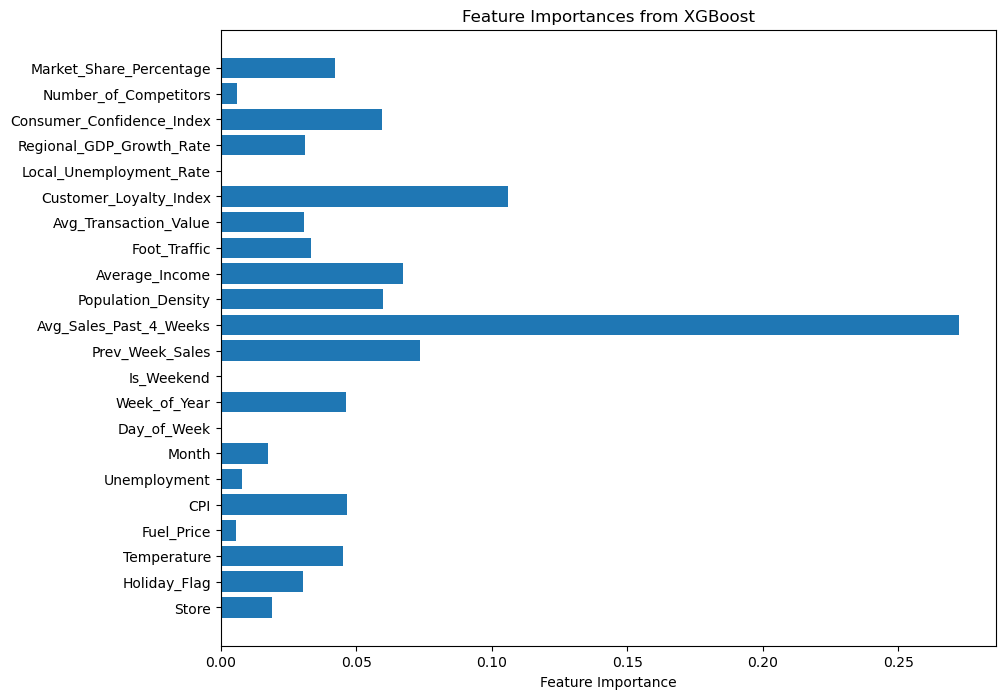

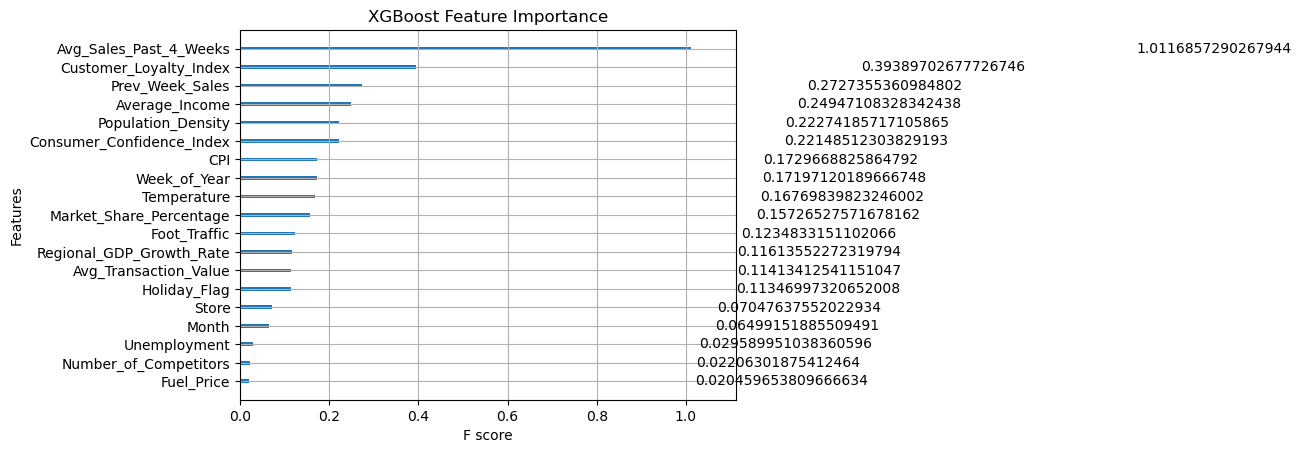

In [72]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XGBoost')
plt.show()

# Alternatively, using XGBoost's built-in plot function
xgb.plot_importance(xgb_model, importance_type='gain')
plt.title('XGBoost Feature Importance')
plt.show()

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   --- ------------------------------------ 41.0/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 7.2 MB/s eta 0:00:00


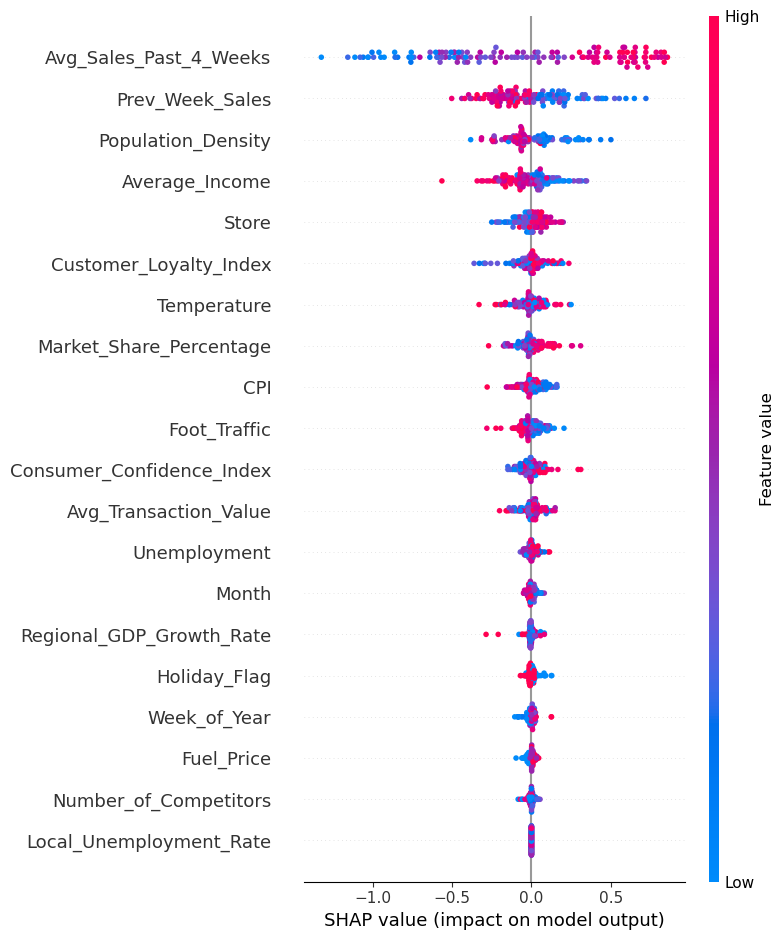

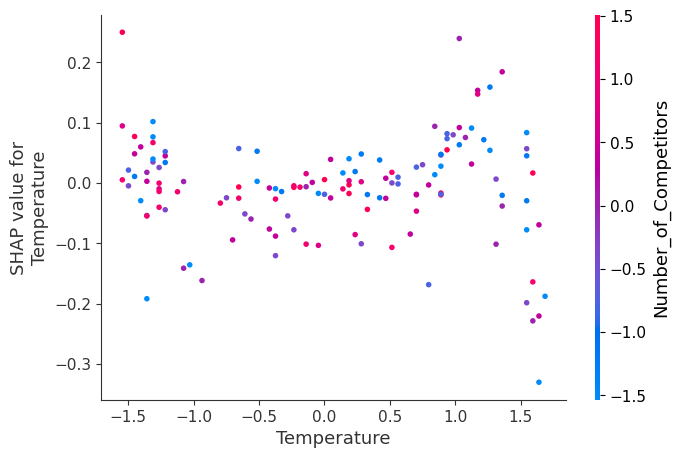

In [88]:
# Install SHAP if not already installed
!pip install shap

# Import necessary libraries
import shap
import xgboost as xgb

# Assuming X_train and X are already defined and preprocessed
# Assuming xgb_model is the trained XGBoost model

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

# Plot SHAP dependence plot for a specific feature (e.g., 'Temperature')
shap.dependence_plot('Temperature', shap_values.values, X_train, feature_names=X_train.columns)

In [98]:
# Import necessary library
import pandas as pd

# Read the CSV file into a DataFrame
df_predict = pd.read_csv('C:\\Users\\Home\\Downloads\\df_dummy (1).csv')

In [100]:
df_predict.head(5)

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day_of_Week,Week_of_Year,...,Population_Density,Average_Income,Foot_Traffic,Avg_Transaction_Value,Customer_Loyalty_Index,Local_Unemployment_Rate,Regional_GDP_Growth_Rate,Consumer_Confidence_Index,Number_of_Competitors,Market_Share_Percentage
0,7,1/7/2024,0,73.287021,3.510723,212.759992,7.995534,1,6,1,...,1178.228948,42246.84490,435.054490,63.088376,3.976753,9.092019,1.640763,146.953687,5,88.781358
1,4,1/14/2024,1,56.772339,2.850312,212.962735,7.547787,1,6,2,...,2786.894495,98751.78403,946.120098,98.100357,5.974885,4.819728,0.775208,121.459510,6,26.828469
2,8,1/21/2024,1,98.826162,2.415883,211.652669,5.648331,1,6,3,...,3631.157631,66164.51239,976.297453,53.806794,6.150632,8.253466,4.909204,54.106752,7,2.515149
3,5,1/28/2024,1,62.673403,3.135401,210.156364,7.367461,1,6,4,...,4362.614622,48258.04224,355.528877,91.548891,9.822984,7.316920,4.194668,89.882090,3,93.410195
4,7,2/4/2024,0,90.195828,2.062627,214.234015,6.297561,2,6,5,...,1966.815073,99737.75898,374.827474,49.095493,1.678116,5.779061,4.302023,93.352074,3,50.602949
